In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#1. Data import
#Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Creating dataframe from a dictionary

data = {'name' : ['Alice','Bob','Richard','Lara'], 
            'age': [25,26,32,45],
               'city' :['London','Manchester','Oxford','Bath'],
        'email':['alice@email.com','bob@email.com','rich@eamil.com','lara@email.com']
        }
df = pd.DataFrame(data)
df

,name,age,city,email
0,Alice,25,London,alice@email.com
1,Bob,26,Manchester,bob@email.com
2,Richard,32,Oxford,rich@eamil.com
3,Lara,45,Bath,lara@email.com


In [12]:
#Importing data
df = pd.read_csv("/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv")

In [8]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [37]:
#Explore first 10 rows
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [10]:
# find the name of the columns
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [11]:
#handling & checking missing value
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [13]:
df.SystolicBP.unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [15]:
df.DiastolicBP.unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68])

**Exploratory Data Analysis (EDA)**

In [16]:
# Display the summary statistics of the numerical columns
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
sorted_SystolicBP=df.sort_values(by='SystolicBP', ascending=True)
sorted_SystolicBP

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
535,16,70,50,7.5,100.0,70,low risk
910,17,70,50,7.9,98.0,70,low risk
661,15,70,50,6.0,98.0,70,mid risk
928,16,70,50,7.5,100.0,70,low risk
19,10,70,50,6.9,98.0,70,low risk
...,...,...,...,...,...,...,...
362,40,160,100,19.0,98.0,77,high risk
583,40,160,100,19.0,98.0,77,high risk
961,40,160,100,19.0,98.0,77,high risk
262,40,160,100,19.0,98.0,77,high risk


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '10'),
  Text(1, 0, '12'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '15'),
  Text(5, 0, '16'),
  Text(6, 0, '17'),
  Text(7, 0, '18'),
  Text(8, 0, '19'),
  Text(9, 0, '20'),
  Text(10, 0, '21'),
  Text(11, 0, '22'),
  Text(12, 0, '23'),
  Text(13, 0, '24'),
  Text(14, 0, '25'),
  Text(15, 0, '26'),
  Text(16, 0, '27'),
  Text(17, 0, '28'),
  Text(18, 0, '29'),
  Text(19, 0, '30'),
  Text(20, 0, '31'),
  Text(21, 0, '32'),
  Text(22, 0, '33'),
  Text(23, 0, '34'),
  Text(24, 0, '35'),
  Text(25, 0, '36'),
  Text(26, 0, '37'),
  Text(27, 0, '38'),
  Text(28, 0, '39'),
  Text(29, 0, '40'),
  Text(30, 0, '41'),
  Text(31, 0, '42'),
  Text(32, 0, '43'),
  Text(33, 0, '44'),
  Text(34, 0, '45'),
  Text(35, 0, '46'),
  Text(36, 0, '48'),
  Text(

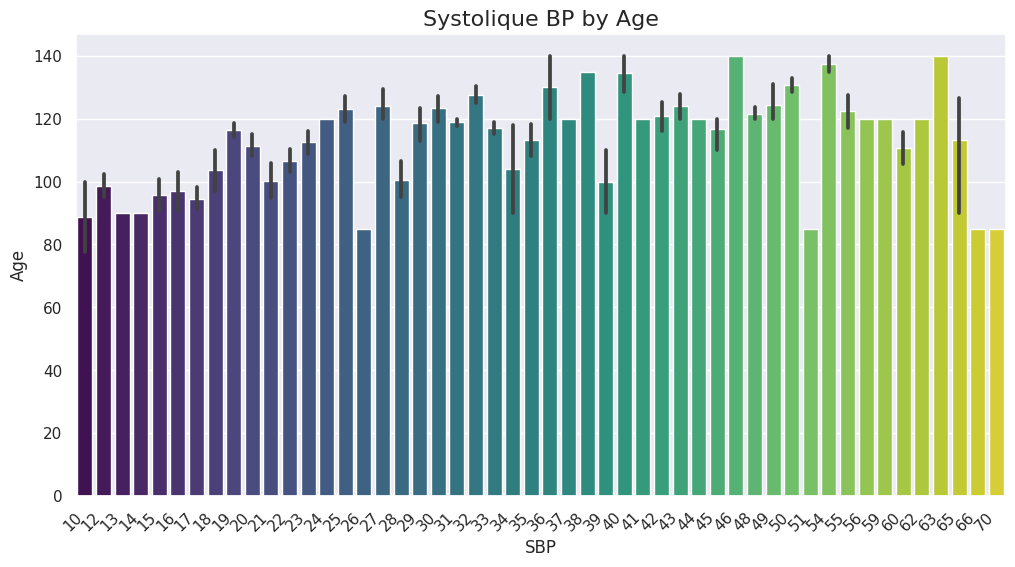

In [31]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=df, x='Age', y='SystolicBP', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Systolique BP by Age', fontsize=16)
ax.set_xlabel('SBP', fontsize=12)
ax.set_ylabel('Age', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

In [34]:
# What is the mean SBP?
df["SystolicBP"].mean()

113.19822485207101

In [35]:
# What is the mean DBP?
df["DiastolicBP"].mean()

76.46055226824457

In [38]:
SystolicBP = pd.DataFrame(df.groupby('SystolicBP')['Age'].mean()).reset_index()
SystolicBP

,SystolicBP,Age
0,70,15.142857
1,75,20.250000
2,76,15.000000
3,78,15.000000
4,80,15.000000
5,83,28.000000
6,85,25.581395
7,90,23.558442
8,95,13.333333
9,99,23.000000


In [54]:
#Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [55]:
#Computing risk level
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [56]:
#using replace function, create a risk level column
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)
df.head()

/tmp/ipykernel_33/290921827.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


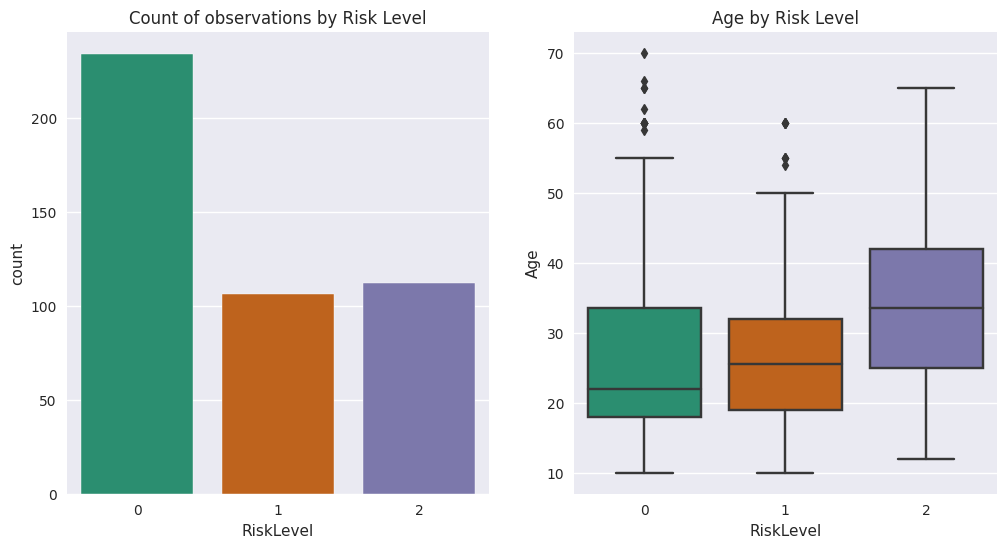

In [59]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

sns.countplot(ax=axes[0], x=df.RiskLevel)
axes[0].set_title("Count of observations by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.Age)
axes[1].set_title("Age by Risk Level");

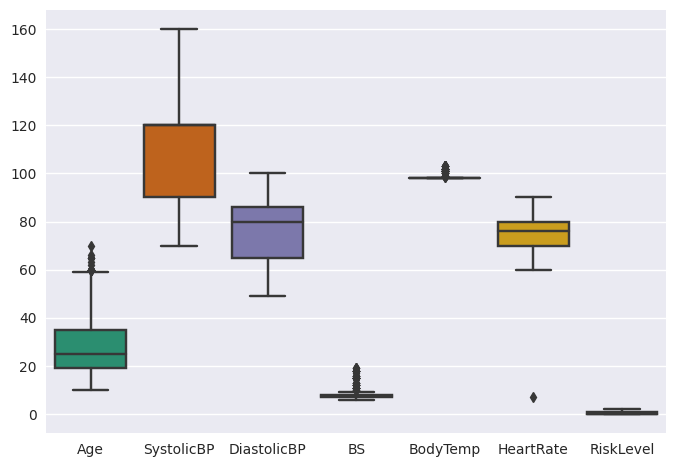

In [57]:
#Box plot of whole dataframe

sns.set_palette("Dark2")

sns.boxplot(df);

/tmp/ipykernel_33/3942839913.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df.head(20), x='Age', y='SystolicBP', ax=ax, marker='o', linestyle='-', color='r', palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


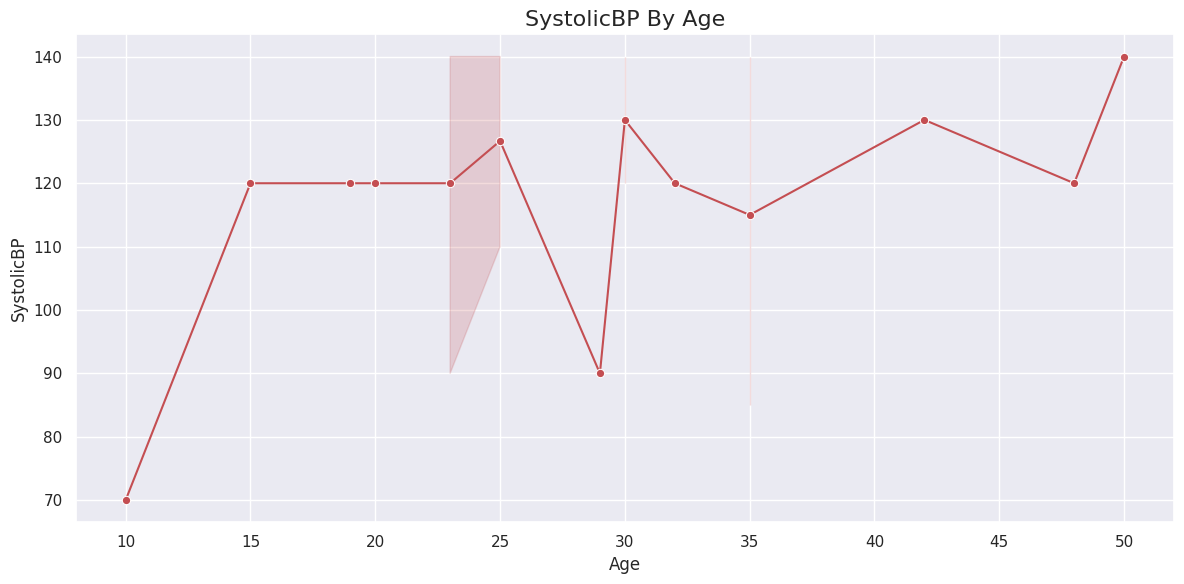

In [44]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the line chart
sns.lineplot(data=df.head(20), x='Age', y='SystolicBP', ax=ax, marker='o', linestyle='-', color='r', palette='viridis')

# Customize the plot
ax.set_title('SystolicBP By Age', fontsize=16)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('SystolicBP', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot

**Heart rate******

In [61]:
#Fixing error in row where HR = 7? can replace it with resonable value

df.HeartRate.mode()

0    70
Name: HeartRate, dtype: int64

In [63]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


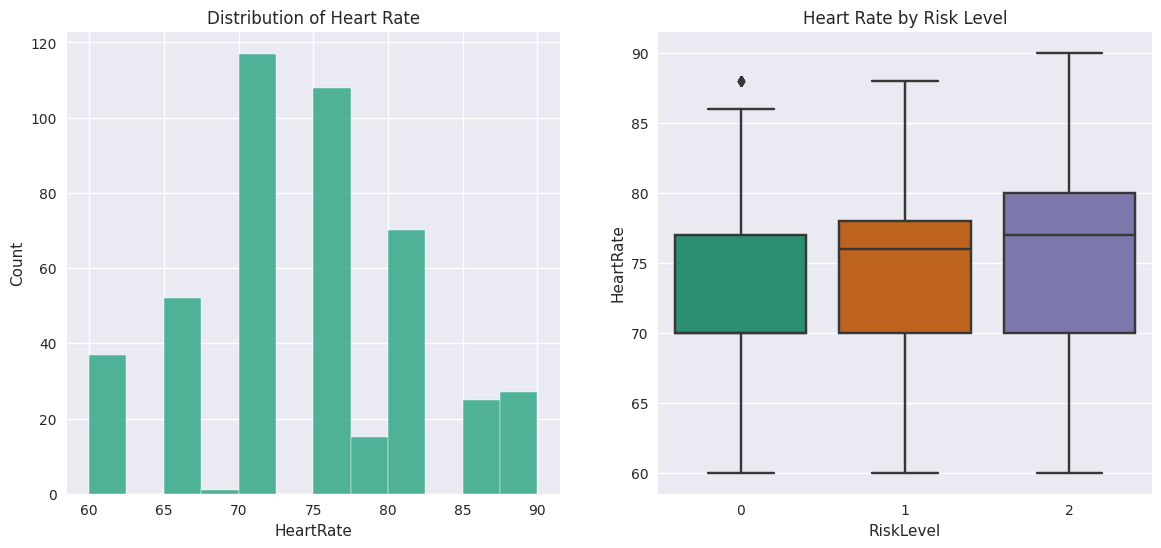

In [64]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.HeartRate)
axes[0].set_title("Distribution of Heart Rate")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.HeartRate)
axes[1].set_title("Heart Rate by Risk Level");

**Temperature**

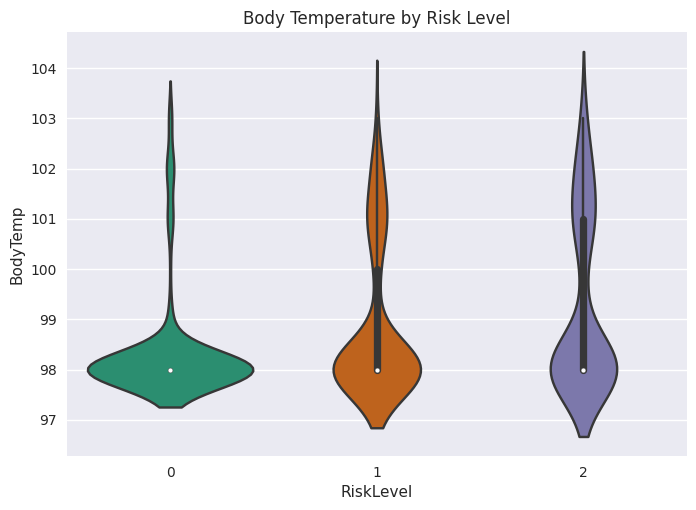

In [65]:
sns.violinplot(y=df.BodyTemp, x=df.RiskLevel).set_title("Body Temperature by Risk Level");

**Correlations**


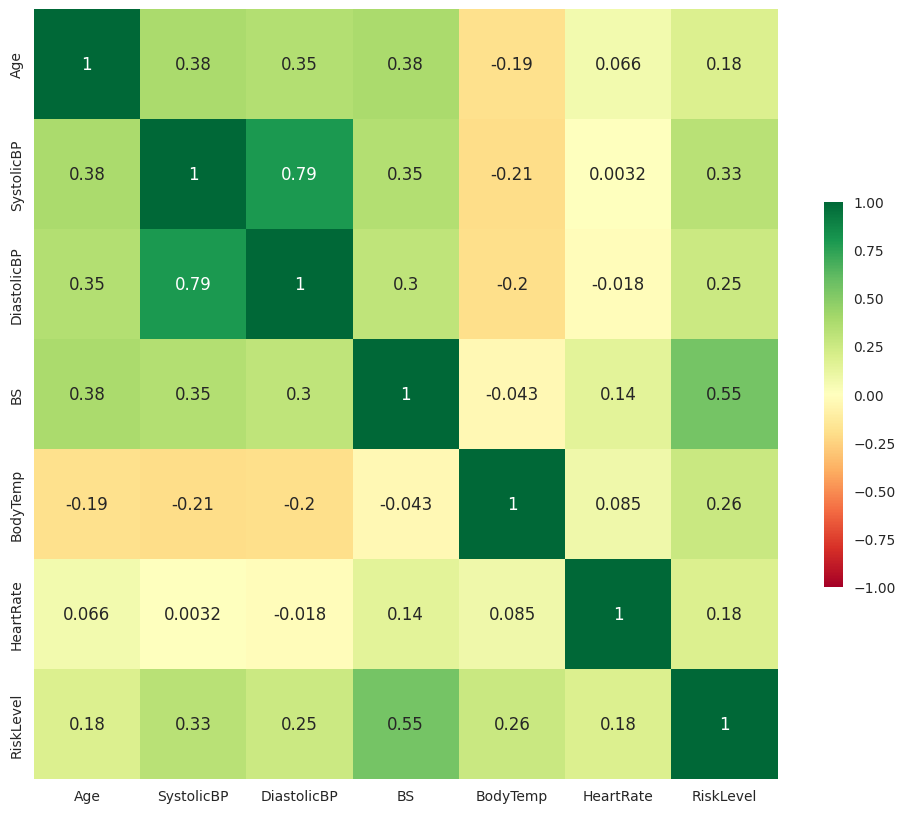

In [66]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn', vmin=-1, center=0,
           cbar_kws={"shrink": .5})

plt.show()

**Skewness varibles:  data distortion,symmetry/ asymmetry of data distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

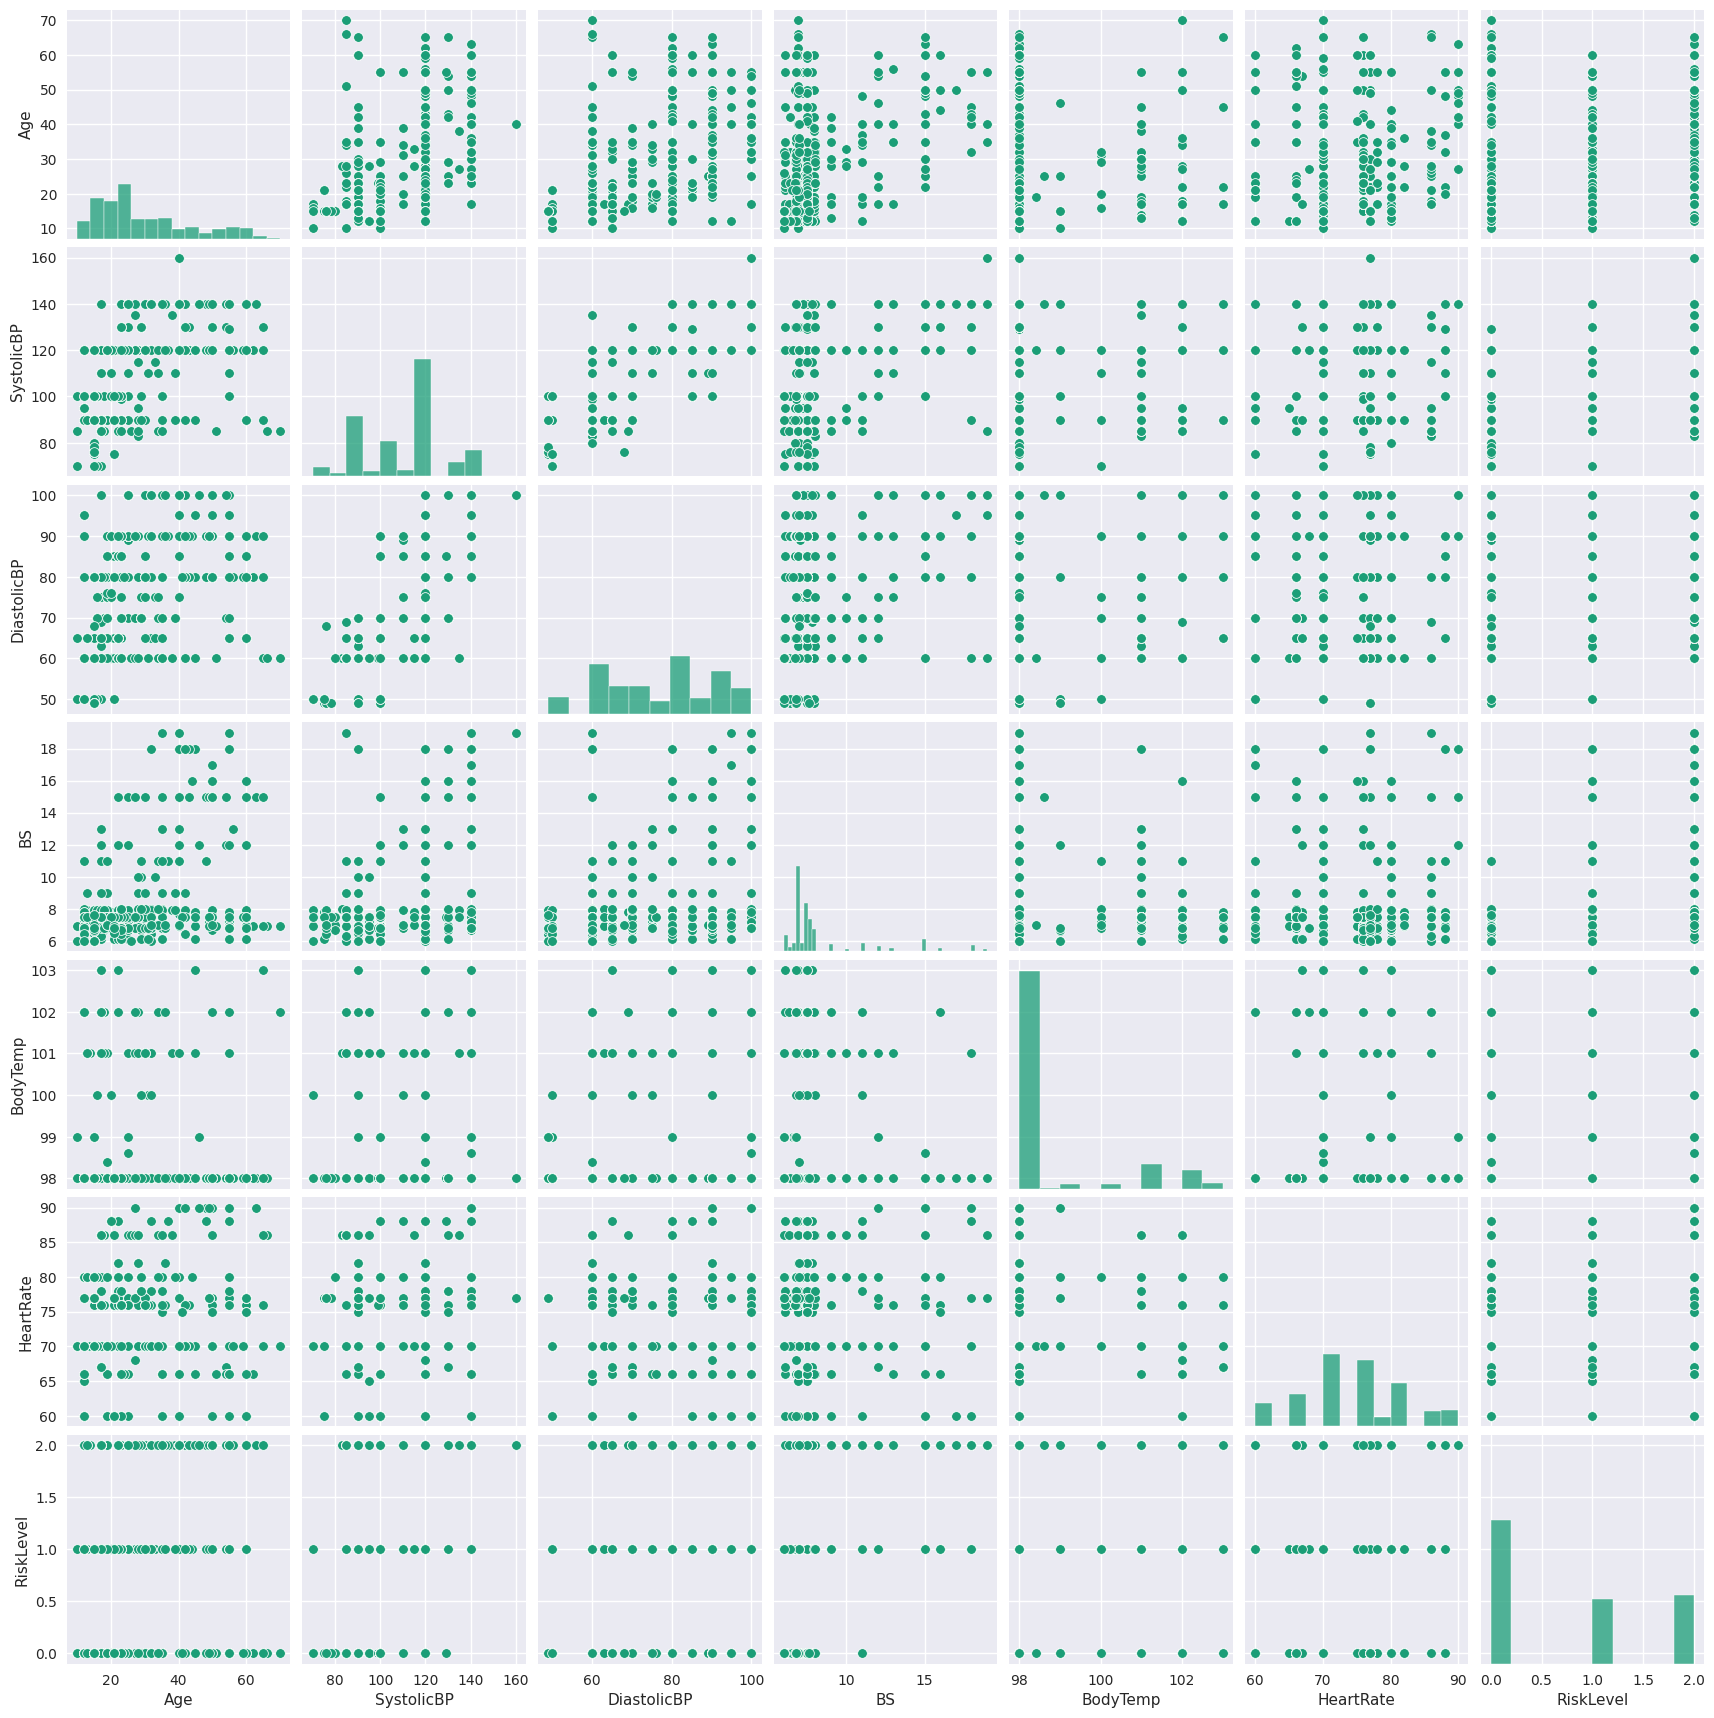

In [67]:
sns.pairplot(df);

**Creating our own Dataset for visualisation**

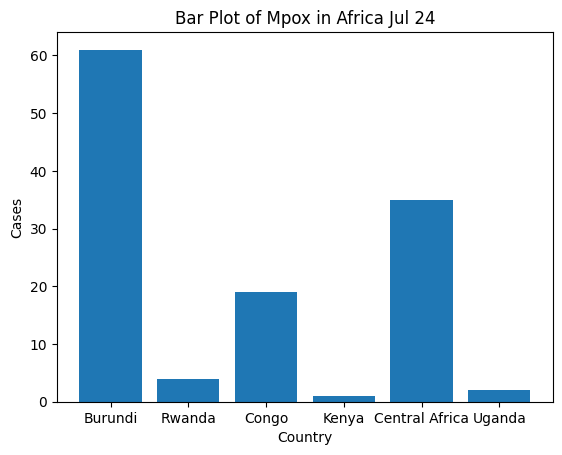

In [3]:
# Sample data
Country = ['Burundi', 'Rwanda', 'Congo', 'Kenya', 
           'Central Africa', 'Uganda']
Cases = [61, 4, 19, 1, 35, 2]

# Create a bar plot
plt.bar(Country, Cases)
plt.title('Bar Plot of Mpox in Africa Jul 24')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.show()

Text(0.5, 1.0, 'Pie chart of Mpox in Africa Jul 24')

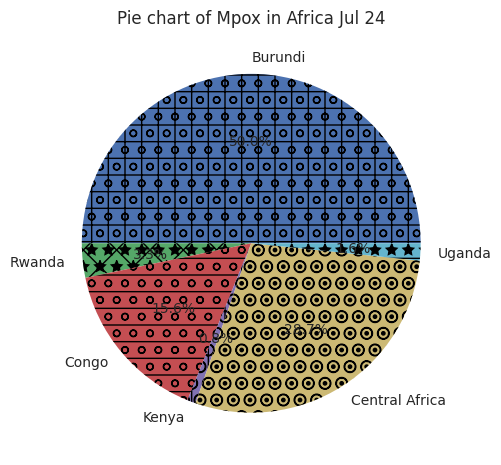

In [33]:
##A Pie chart
from matplotlib.patches import Rectangle

labels = ['Burundi', 'Rwanda', 'Congo', 'Kenya', 
           'Central Africa', 'Uganda']
sizes = [61, 4, 19, 1, 35, 2]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%', hatch=['+o', 'x*', 'o-', 'O|', 'O.', '*-'])

plt.title('Pie chart of Mpox in Africa Jul 24')
#plt.show()

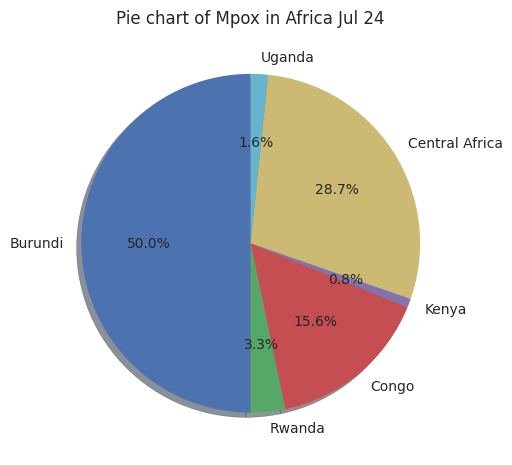

In [38]:
from matplotlib.patches import Rectangle

labels = ['Burundi', 'Rwanda', 'Congo', 'Kenya', 
           'Central Africa', 'Uganda']
sizes = [61, 4, 19, 1, 35, 2]
fig, ax = plt.subplots()
explode = (0, 0.1, 0, 0)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
plt.title('Pie chart of Mpox in Africa Jul 24')
plt.show()

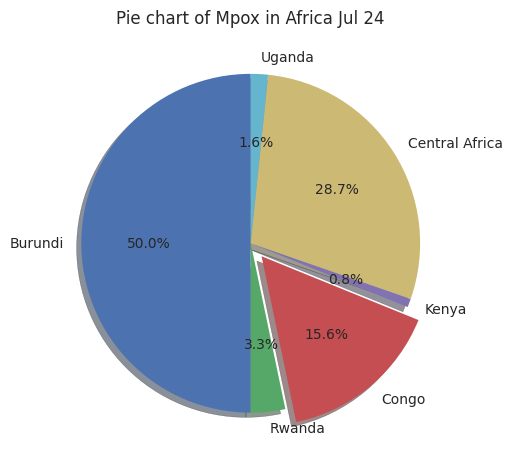

In [42]:
#Explode

labels = ['Burundi', 'Rwanda', 'Congo', 'Kenya', 
           'Central Africa', 'Uganda']
sizes = [61, 4, 19, 1, 35, 2]
fig, ax = plt.subplots()
explode = (0, 0,  0.1, 0, 0, 0)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
       explode=explode, shadow={'ox': -0.04, 
                                'edgecolor': 'none', 
                                'shade': 0.9}, 
       startangle=90)
plt.title('Pie chart of Mpox in Africa Jul 24')
plt.show()

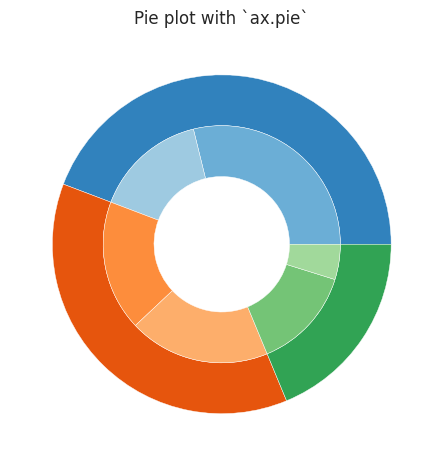

In [43]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

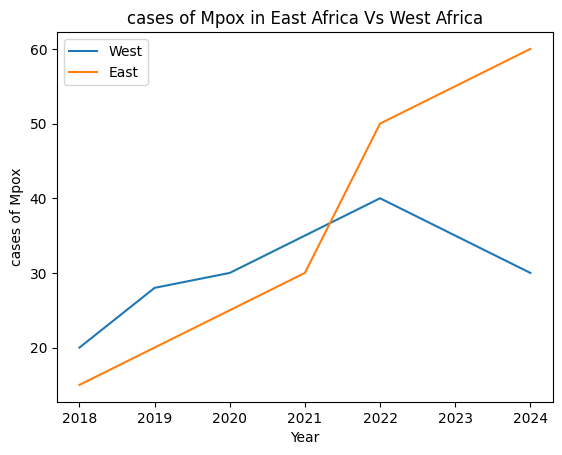

In [16]:
#data cases of Mpox in East Africa Vs West Africa

Year = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
West_Africa = [20, 28, 30, 35, 40, 35, 30]
East_Africa = [15, 20, 25, 30, 50, 55, 60]

# line plot

plt.plot(Year, West_Africa, label='West')
plt.plot(Year, East_Africa, label='East')
# adding title 
plt.title('cases of Mpox in East Africa Vs West Africa') 
# adding axis labels
plt.xlabel('Year') 
plt.ylabel('cases of Mpox')
plt.legend()
# showing the plot
plt.show()


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


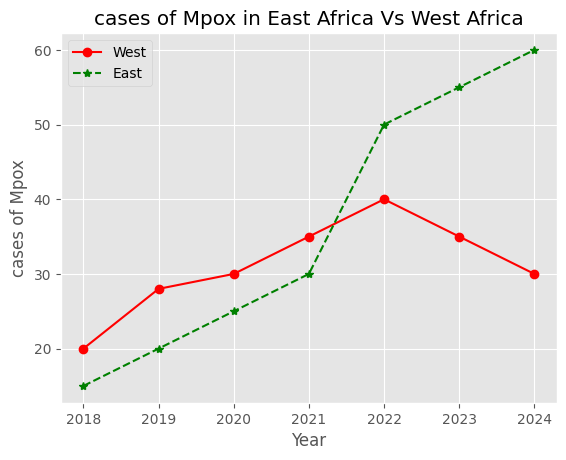

In [21]:
#data cases of Mpox in East Africa Vs West Africa
#format strings and Styles for Plotting
# Same line plot

Year = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
West_Africa = [20, 28, 30, 35, 40, 35, 30]
East_Africa = [15, 20, 25, 30, 50, 55, 60]

# creating a line plot
plt.plot(Year, West_Africa, marker='o', linestyle='-', 
         color='r', label='West')
plt.plot(Year, East_Africa, marker='*', linestyle='--', color='g', label='East')
# adding title 
plt.title('cases of Mpox in East Africa Vs West Africa') 
# adding axis labels
plt.xlabel('Year') 
plt.ylabel('cases of Mpox')
plt.legend()
plt.grid(True)
print(plt.style.available) #to call different backgrounds
plt.style.use('seaborn-v0_8')
# showing the plot
plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


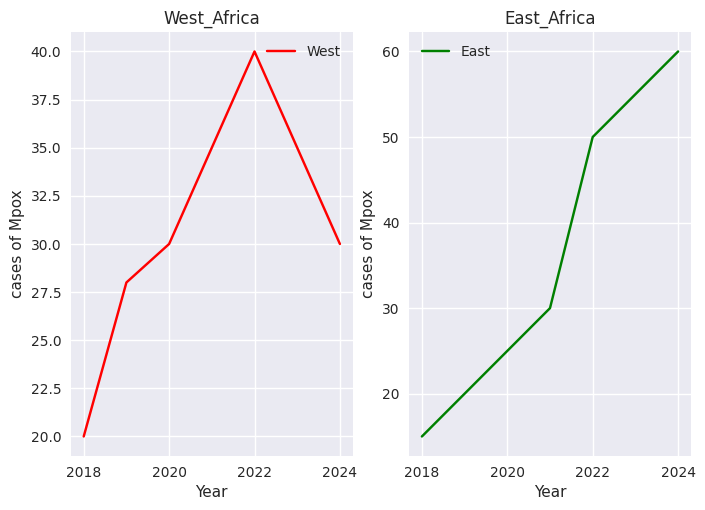

In [23]:
# creating a subplots
#1 2 1
#1 2 2

plt.subplot(1, 2, 1)
plt.plot(Year, West_Africa, color='r', label='West')
plt.title('West_Africa')
plt.xlabel('Year') 
plt.ylabel('cases of Mpox')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Year, East_Africa, color='g', label='East')
plt.title('East_Africa')
plt.xlabel('Year') 
plt.ylabel('cases of Mpox')
plt.legend()

print(plt.style.available) #to call different backgrounds
plt.style.use('seaborn-v0_8')
plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


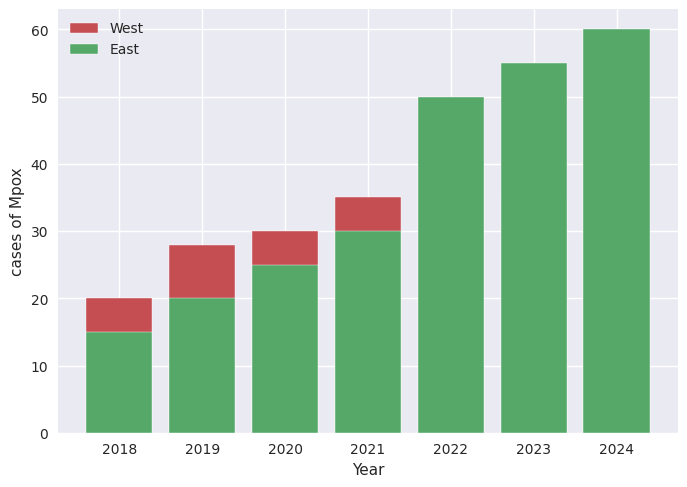

In [68]:

# Bar plot

Year = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
West_Africa = [20, 28, 30, 35, 40, 35, 30]
East_Africa = [15, 20, 25, 30, 50, 55, 60]

# creating a bar plot
plt.bar(Year, West_Africa, color='r', label='West')
plt.bar(Year, East_Africa, color='g', label='East')

# adding title 
#plt.title('cases of Mpox in East Africa Vs West Africa') 
# adding axis labels
plt.xlabel('Year') 
plt.ylabel('cases of Mpox')
plt.legend()
plt.grid(True)
print(plt.style.available) #to call different backgrounds
plt.style.use('seaborn-v0_8')
# showing the plot
plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


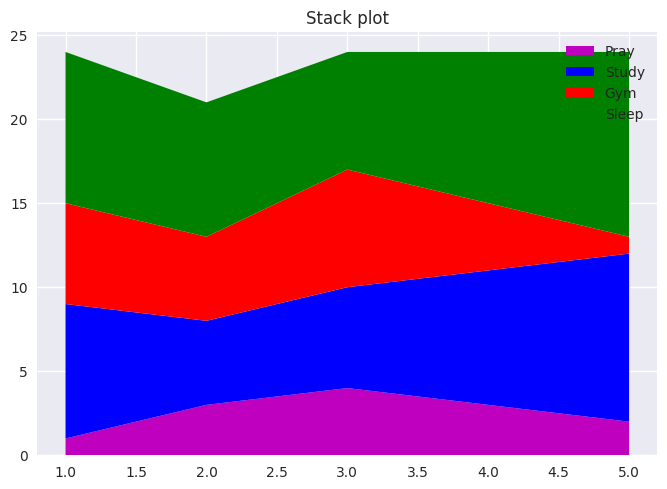

In [48]:
# Stack plot

Days = [1, 2, 3, 4, 5]

Pray = [1, 3, 4, 3, 2]
Study = [8, 5, 6, 8, 10]
Gym = [6, 5, 7, 4, 1]
Sleep = [9, 8, 7, 9, 11]

labels = ['Pray', 'Study', 'Gym', 'Sleep']
colors = ['m', 'b', 'r', 'g']
plt.stackplot(Days, Pray, Study, Gym, 
              Sleep, labels=labels, colors=colors)
plt.title('Stack plot')
plt.legend()

plt.grid(True)
print(plt.style.available) #to call different backgrounds
plt.style.use('seaborn-v0_8')
# showing the plot
plt.show()